In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split


# 문제에 대한 정보
problem = pd.read_csv('tag_key.csv')

In [24]:
problem.shape

(5598, 196)

In [25]:
# 사용할 Column
# problemid, level, averageTries, tag-key
# 데이터 전처리
problem = problem.iloc[:,1:]
problem.head()

,problemId,level,averageTries,math,implementation,dp,graphs,data_structures,string,greedy,...,top_tree,chordal_graph,majority_vote,a_star,rb_tree,birthday,degree_sequence,discrete_kth_root,multipoint_evaluation,differential_cryptanalysis
0,1000,1,2.3692,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1001,1,1.3977,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1271,1,3.0061,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1550,1,1.5381,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2338,1,1.9530,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [26]:
# 데이터 중복행 삭제
problem = problem.drop_duplicates()
problem.head()
problem_no = problem.iloc[:,1:]

In [27]:
k = 30
model = KMeans(n_clusters=k, random_state=10)
model.fit(problem_no)

KMeans(n_clusters=30, random_state=10)

In [28]:
problem['cluster'] = model.fit_predict(problem_no)

In [29]:
problem.tail()

,problemId,level,averageTries,math,implementation,dp,graphs,data_structures,string,greedy,...,chordal_graph,majority_vote,a_star,rb_tree,birthday,degree_sequence,discrete_kth_root,multipoint_evaluation,differential_cryptanalysis,cluster
5593,21837,10,2.7500,0,0,0,1,1,1,0,...,0,0,0,0,0,0,0,0,0,13
5594,21855,10,1.2500,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,14
5595,21917,10,1.1429,0,0,0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,11
5596,21937,10,2.1160,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,13
5597,21959,10,1.1250,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,14


In [30]:
x = problem['level']
y = problem['averageTries']

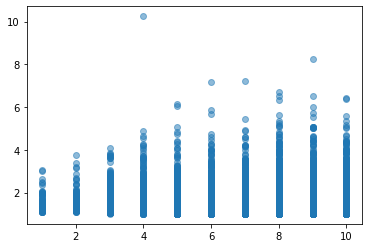

In [31]:
plt.scatter(x,y, alpha = 0.5)

In [429]:
problem['cluster']

0        4
1        4
2        4
3        4
4        4
        ..
5593    13
5594    14
5595    11
5596    13
5597    14
Name: cluster, Length: 4872, dtype: int32

In [407]:
classifier = KNeighborsClassifier(n_neighbors = 5)
X = problem_no
Y = problem['cluster']

In [410]:
trainX, testX, trainy, testy = train_test_split(X,Y,test_size = 0.3, random_state =1)

In [412]:
classifier.fit(trainX,trainy)

KNeighborsClassifier()

In [415]:
pred_y = classifier.predict(testX)

In [416]:
print(pred_y)

[10  3 28 ...  4  0  7]
